In [4]:
print('importing libraries')
import tensorflow as tf
import numpy as np
from tensorflow import keras
print('libraries loaded')

importing libraries
libraries loaded


In [2]:
#Fashion MNIST data is available directly in the tf.keras datasets API.
#Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
#Each example is a 28x28 grayscale image, associated with a label from 10 classes
mnist = tf.keras.datasets.fashion_mnist

In [3]:
#training  and test list obtained by called load object on mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   0  57  40   0   0   0 

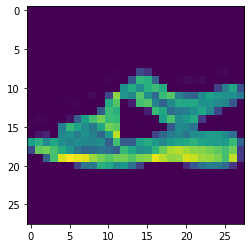

In [7]:
# visualizing training images
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[43])
print(training_labels[43])
print(training_images[43])

In [8]:
# normalizing the images  .. values in either 1 or 0
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [10]:
training_images[43]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

In [11]:
# model desigining

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),  # input later
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # 10 because that many class labels

In [14]:
# fitting and compiling
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 2s 877us/step - loss: 0.2827 - accuracy: 0.8953
Epoch 2/7
1875/1875 [==============================] - 2s 870us/step - loss: 0.2683 - accuracy: 0.9006
Epoch 3/7
1875/1875 [==============================] - 2s 873us/step - loss: 0.2575 - accuracy: 0.9057
Epoch 4/7
1875/1875 [==============================] - 2s 862us/step - loss: 0.2476 - accuracy: 0.9082
Epoch 5/7
1875/1875 [==============================] - 2s 830us/step - loss: 0.2414 - accuracy: 0.9092
Epoch 6/7
1875/1875 [==============================] - 2s 930us/step - loss: 0.2335 - accuracy: 0.9111
Epoch 7/7
1875/1875 [==============================] - 2s 863us/step - loss: 0.2246 - accuracy: 0.9144


In [15]:
# with epoch 7 it gives 91.44 % accuracy

In [16]:
# validation
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 725us/step - loss: 0.3494 - accuracy: 0.8820


[0.34941694140434265, 0.8820000290870667]

In [17]:
#it gave accuracy of 88.2 #

In [18]:
classifications = model.predict(test_images)

print(classifications[0])

[3.3683250e-09 1.2709572e-12 1.7850156e-12 1.4389422e-12 2.8715103e-11 1.0267283e-03 2.1015774e-09 3.2101944e-03 2.8368699e-08 9.9576306e-01]


In [22]:
print(test_labels[1])

2


In [21]:
# it It's the probability that this item is each of the 10 classes
# means the test_image belongs to label 1

In [23]:
# call back function 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [24]:
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4713
Epoch 2/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.3584
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3583
